<h3>Imports required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report 

In [2]:
# Show all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#reading the csv file
data=pd.read_csv('telecom_churn_data.csv')

In [4]:
data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [5]:
#describing the dataset
data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [6]:
#creating copy of dataset
copy_data=data

In [7]:
#As we can form the result that we have total of 226 columns
len(data.columns)

226

In [8]:
#Segregating columns on the basis of type
obj_col=[]
number_col=[]
for col in data.columns:
    if data[col].dtype=='object':
        obj_col.append(col)
    if data[col].dtype=='int64' or data[col].dtype=='float64' :
        number_col.append(col)

In [9]:
#Checking total no of columns to validate
len(obj_col)

12

In [10]:
#Checking total no of columns to validate
len(number_col)

214

In [11]:
#Check for number of rows
len(data)

99999

In [13]:
#Checking for NA
for col in data.columns:
    print(col+": ",data[col].isna().sum())

mobile_number:  0
circle_id:  0
loc_og_t2o_mou:  1018
std_og_t2o_mou:  1018
loc_ic_t2o_mou:  1018
last_date_of_month_6:  0
last_date_of_month_7:  601
last_date_of_month_8:  1100
last_date_of_month_9:  1659
arpu_6:  0
arpu_7:  0
arpu_8:  0
arpu_9:  0
onnet_mou_6:  3937
onnet_mou_7:  3859
onnet_mou_8:  5378
onnet_mou_9:  7745
offnet_mou_6:  3937
offnet_mou_7:  3859
offnet_mou_8:  5378
offnet_mou_9:  7745
roam_ic_mou_6:  3937
roam_ic_mou_7:  3859
roam_ic_mou_8:  5378
roam_ic_mou_9:  7745
roam_og_mou_6:  3937
roam_og_mou_7:  3859
roam_og_mou_8:  5378
roam_og_mou_9:  7745
loc_og_t2t_mou_6:  3937
loc_og_t2t_mou_7:  3859
loc_og_t2t_mou_8:  5378
loc_og_t2t_mou_9:  7745
loc_og_t2m_mou_6:  3937
loc_og_t2m_mou_7:  3859
loc_og_t2m_mou_8:  5378
loc_og_t2m_mou_9:  7745
loc_og_t2f_mou_6:  3937
loc_og_t2f_mou_7:  3859
loc_og_t2f_mou_8:  5378
loc_og_t2f_mou_9:  7745
loc_og_t2c_mou_6:  3937
loc_og_t2c_mou_7:  3859
loc_og_t2c_mou_8:  5378
loc_og_t2c_mou_9:  7745
loc_og_mou_6:  3937
loc_og_mou_7:  3859
lo

### Filtering High value customers

In [14]:
data['total_rech_amt_6']

0          362
1           74
2          168
3          230
4          196
5          120
6          499
7         1580
8          437
9          220
10           0
11         366
12         110
13         507
14          60
15           0
16         570
17         816
18           0
19         154
20         437
21         600
22         255
23           0
24         440
25         256
26           0
27          60
28          90
29         196
30           0
31         230
32          69
33        1058
34         400
35         401
36         100
37           0
38         420
39         154
40           0
41         496
42         179
43         200
44         244
45         250
46         146
47         410
48        2317
49         132
50          90
51           0
52         198
53        1159
54          90
55          34
56         528
57        1389
58         180
59         250
60         430
61         621
62         203
63          67
64          90
65         126
66        

In [15]:
#Calculating total recharge data amount for each month
data['total_rech_data_amt_6'] = data['av_rech_amt_data_6'] * data['total_rech_data_6']
data['total_rech_data_amt_7'] = data['av_rech_amt_data_7'] * data['total_rech_data_7']
data['total_rech_data_amt_8'] = data['av_rech_amt_data_8'] * data['total_rech_data_8']
data['total_rech_data_amt_9'] = data['av_rech_amt_data_9'] * data['total_rech_data_9']

In [16]:
#Checking for na in 6 and 7 month
data['total_rech_data_amt_6'].isna().sum()

74846

In [17]:
data['total_rech_amt_6'].isna().sum()


0

In [18]:
data['total_rech_amt_7'].isna().sum()

0

In [23]:
data['total_rech_data_amt_7'].isna().sum()

0

In [20]:
col_del=['av_rech_amt_data_6','total_rech_data_6','av_rech_amt_data_7','total_rech_data_7','av_rech_amt_data_8','total_rech_data_8','av_rech_amt_data_9','total_rech_data_9']
data.drop(['av_rech_amt_data_6','total_rech_data_6'],axis=1,inplace=True)

<b>As we can see from the above result that we need to impute the data

In [21]:
data['total_rech_amt_6'].fillna(0,inplace=True)
data['total_rech_data_amt_6'].fillna(0,inplace=True)
data['total_rech_amt_7'].fillna(0,inplace=True)
data['total_rech_data_amt_7'].fillna(0,inplace=True)

In [22]:
#Checking for na in 6 and 7 month
data['total_rech_data_amt_6'].isna().sum()

0

In [24]:
data['total_rech_data_amt_7'].isna().sum()

0

In [25]:
av_rech_6and7 = (data['total_rech_amt_6'] + data['total_rech_amt_7']+ data['total_rech_data_amt_6'] + data['total_rech_data_amt_7'])/2

In [26]:
#filtering the data based on percentile
percentile_70 = np.percentile(av_rech_6and7, 70.0)
print("70th percentile is : ", percentile_70)
hv_customer_data = data[av_rech_6and7 >= percentile_70]


70th percentile is :  478.0


In [25]:
#Checking no of rows
len(hv_customer_data)

30001

### Creating Target Variable from Month 9

In [54]:
hv_customer_data['roam_og_mou_9'].isna().sum()

1901

In [55]:
hv_customer_data['roam_ic_mou_9'].head()

0     NaN
7     NaN
8     0.0
21    0.0
23    0.0
Name: roam_ic_mou_9, dtype: float64

In [56]:
hv_customer_data['roam_ic_mou_9'].fillna(0,inplace=True)
hv_customer_data['roam_og_mou_9'].fillna(0,inplace=True)

C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [57]:
data['roam_ic_mou_9'].head()

0     0.00
1     0.00
2    38.49
3     0.00
4     0.00
Name: roam_ic_mou_9, dtype: float64

In [60]:
#Adding Churn colums
hv_customer_data['customer_churn'] =hv_customer_data.apply(lambda X: 1 if (X.total_ic_mou_9 == 0 and X.total_og_mou_9 == 0 and X.vol_2g_mb_9==0 and X.vol_3g_mb_9==0 and X.roam_ic_mou_9==0 and X.roam_og_mou_9==0) else 0, axis=1)


C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [61]:
#Checking the dataframe
hv_customer_data.head(20)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   
33     7000149764        109             0.0             0.0             0.0   
38     7000815202        109             0.0             0.0             0.0   
41     7000721289        109             0.0             0.0             0.0   
48     7000294396        109             0.0             0.0             0.0   
53     7002188521        109             0.0             0.0             0.0   
56     7002180748        109             0.0             0.0             0.0   
57     7001682585        109             0.0             0.0             0.0   
61     7000152517        109             0.0             0.0             0.0   
67     7000800341        109             0.0             0.0             0.0   
69     7002393996        109             0.0             0.0             0.0   
73     7002402996        109             0.0             0.0             0.0   
77     7001328263        109             0.0             0.0             0.0   
86     7000175867        109             0.0             0.0             0.0   
87     7001728145        109             0.0             0.0             0.0   
91     7000160837        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0             6/30/2014            7/31/2014            8/31/2014   
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
21            6/30/2014            7/31/2014            8/31/2014   
23            6/30/2014            7/31/2014            8/31/2014   
33            6/30/2014            7/31/2014            8/31/2014   
38            6/30/2014            7/31/2014            8/31/2014   
41            6/30/2014            7/31/2014            8/31/2014   
48            6/30/2014            7/31/2014            8/31/2014   
53            6/30/2014            7/31/2014            8/31/2014   
56            6/30/2014            7/31/2014            8/31/2014   
57            6/30/2014            7/31/2014            8/31/2014   
61            6/30/2014            7/31/2014            8/31/2014   
67            6/30/2014            7/31/2014            8/31/2014   
69            6/30/2014            7/31/2014            8/31/2014   
73            6/30/2014            7/31/2014            8/31/2014   
77            6/30/2014            7/31/2014            8/31/2014   
86            6/30/2014            7/31/2014            8/31/2014   
87            6/30/2014            7/31/2014            8/31/2014   
91            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6    arpu_7    arpu_8    arpu_9  onnet_mou_6  \
0             9/30/2014   197.385   214.816   213.803    21.100          NaN   
7             9/30/2014  1069.180  1349.850  3171.480   500.000        57.84   
8             9/30/2014   378.721   492.223   137.362   166.787       413.69   
21            9/30/2014   514.453   597.753   637.760   578.596       102.41   
23            9/30/2014    74.350   193.897   366.966   811.480        48.96   
33            9/30/2014   977.020  2362.833   409.230   799.356         0.00   
38            9/30/2014   363.987   486.558   393.909   391.709       248.99   
41            9/30/2014   482.832   425.764   229.769   143.596        86.39   
48            9/30/2014  1873.271   575.927   179.218  1189.744      2061.69   
53            9/30/2014   978.077  1141.296   706.020  1076.247       135

### Data Preparation

In [62]:
#Checking the imbalance nature of the data
print(len(hv_customer_data[hv_customer_data['customer_churn']==1]))
print(len(hv_customer_data))

1641
30001


In [63]:
copy_hv_customer_data=hv_customer_data

In [64]:
hv_customer_data.shape

(30001, 229)

In [65]:
#Dropping 9 month column from the dataset as it will not be used for modelling
for col in hv_customer_data.columns:
    if '_9' in col:
        print('Dropping column name: ', col)
        hv_customer_data.drop(col, axis=1, inplace=True)

Dropping column name:  last_date_of_month_9


C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Dropping column name:  arpu_9
Dropping column name:  onnet_mou_9
Dropping column name:  offnet_mou_9
Dropping column name:  roam_ic_mou_9
Dropping column name:  roam_og_mou_9
Dropping column name:  loc_og_t2t_mou_9
Dropping column name:  loc_og_t2m_mou_9
Dropping column name:  loc_og_t2f_mou_9
Dropping column name:  loc_og_t2c_mou_9
Dropping column name:  loc_og_mou_9
Dropping column name:  std_og_t2t_mou_9
Dropping column name:  std_og_t2m_mou_9
Dropping column name:  std_og_t2f_mou_9
Dropping column name:  std_og_t2c_mou_9
Dropping column name:  std_og_mou_9
Dropping column name:  isd_og_mou_9
Dropping column name:  spl_og_mou_9
Dropping column name:  og_others_9
Dropping column name:  total_og_mou_9
Dropping column name:  loc_ic_t2t_mou_9
Dropping column name:  loc_ic_t2m_mou_9
Dropping column name:  loc_ic_t2f_mou_9
Dropping column name:  loc_ic_mou_9
Dropping column name:  std_ic_t2t_mou_9
Dropping column name:  std_ic_t2m_mou_9
Dropping column name:  std_ic_t2f_mou_9
Dropping col

In [66]:
hv_customer_data.shape

(30001, 174)

In [67]:
#Checking for single valued column
for col in hv_customer_data:
    if len(hv_customer_data[col].value_counts())==1:
        print('Dropping column name', col)
        hv_customer_data.drop(col, axis=1, inplace=True)

Dropping column name circle_id
Dropping column name loc_og_t2o_mou
Dropping column name std_og_t2o_mou
Dropping column name loc_ic_t2o_mou
Dropping column name last_date_of_month_6
Dropping column name last_date_of_month_7
Dropping column name last_date_of_month_8
Dropping column name std_og_t2c_mou_6
Dropping column name std_og_t2c_mou_7
Dropping column name std_og_t2c_mou_8
Dropping column name std_ic_t2o_mou_6
Dropping column name std_ic_t2o_mou_7
Dropping column name std_ic_t2o_mou_8


In [68]:
#checking affect of drop
hv_customer_data.shape

(30001, 161)

In [69]:
#Dropping column having 30% of null values
for col in hv_customer_data.columns:
    per=hv_customer_data[col].isna().sum()*100/len(hv_customer_data)
    if per>30:
        print('Dropping column name', col)
        hv_customer_data.drop(col, axis=1, inplace=True)
        

Dropping column name date_of_last_rech_data_6
Dropping column name date_of_last_rech_data_7
Dropping column name date_of_last_rech_data_8
Dropping column name total_rech_data_7
Dropping column name total_rech_data_8
Dropping column name max_rech_data_6
Dropping column name max_rech_data_7
Dropping column name max_rech_data_8
Dropping column name count_rech_2g_6
Dropping column name count_rech_2g_7
Dropping column name count_rech_2g_8
Dropping column name count_rech_3g_6
Dropping column name count_rech_3g_7
Dropping column name count_rech_3g_8
Dropping column name av_rech_amt_data_7
Dropping column name av_rech_amt_data_8
Dropping column name arpu_3g_6
Dropping column name arpu_3g_7
Dropping column name arpu_3g_8
Dropping column name arpu_2g_6
Dropping column name arpu_2g_7
Dropping column name arpu_2g_8
Dropping column name night_pck_user_6
Dropping column name night_pck_user_7
Dropping column name night_pck_user_8
Dropping column name fb_user_6
Dropping column name fb_user_7
Dropping 

In [70]:
hv_customer_data.shape

(30001, 132)

In [71]:
hv_customer_data.isna().sum()

mobile_number               0
arpu_6                      0
arpu_7                      0
arpu_8                      0
onnet_mou_6               545
onnet_mou_7               537
onnet_mou_8              1174
offnet_mou_6              545
offnet_mou_7              537
offnet_mou_8             1174
roam_ic_mou_6             545
roam_ic_mou_7             537
roam_ic_mou_8            1174
roam_og_mou_6             545
roam_og_mou_7             537
roam_og_mou_8            1174
loc_og_t2t_mou_6          545
loc_og_t2t_mou_7          537
loc_og_t2t_mou_8         1174
loc_og_t2m_mou_6          545
loc_og_t2m_mou_7          537
loc_og_t2m_mou_8         1174
loc_og_t2f_mou_6          545
loc_og_t2f_mou_7          537
loc_og_t2f_mou_8         1174
loc_og_t2c_mou_6          545
loc_og_t2c_mou_7          537
loc_og_t2c_mou_8         1174
loc_og_mou_6              545
loc_og_mou_7              537
loc_og_mou_8             1174
std_og_t2t_mou_6          545
std_og_t2t_mou_7          537
std_og_t2t

In [72]:
for col in hv_customer_data.columns:
    if hv_customer_data[col].dtype=='int64' or hv_customer_data[col].dtype=='float64' :
        mean=hv_customer_data[col].mean()
        if hv_customer_data[col].isna().sum()>0:
            hv_customer_data.fillna(mean,inplace=True)

C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [73]:
hv_customer_data['onnet_mou_6'].isna().sum()

0

In [74]:
hv_customer_data.isna().sum()

mobile_number            0
arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
loc_og_t2t_mou_6         0
loc_og_t2t_mou_7         0
loc_og_t2t_mou_8         0
loc_og_t2m_mou_6         0
loc_og_t2m_mou_7         0
loc_og_t2m_mou_8         0
loc_og_t2f_mou_6         0
loc_og_t2f_mou_7         0
loc_og_t2f_mou_8         0
loc_og_t2c_mou_6         0
loc_og_t2c_mou_7         0
loc_og_t2c_mou_8         0
loc_og_mou_6             0
loc_og_mou_7             0
loc_og_mou_8             0
std_og_t2t_mou_6         0
std_og_t2t_mou_7         0
std_og_t2t_mou_8         0
std_og_t2m_mou_6         0
std_og_t2m_mou_7         0
std_og_t2m_mou_8         0
s

In [75]:
hv_customer_data.shape

(30001, 132)

In [76]:
hv_customer_data.drop(['mobile_number'],axis=1,inplace=True)

<h3>Exploratory Data Analysis [EDA]

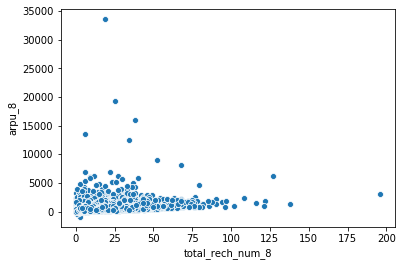

In [77]:
sns.scatterplot(hv_customer_data['total_rech_num_8'],hv_customer_data['arpu_8'])
plt.show()

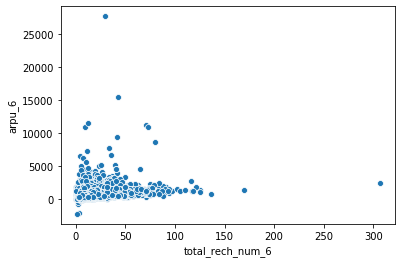

In [78]:
sns.scatterplot(hv_customer_data['total_rech_num_6'],hv_customer_data['arpu_6'])
plt.show()

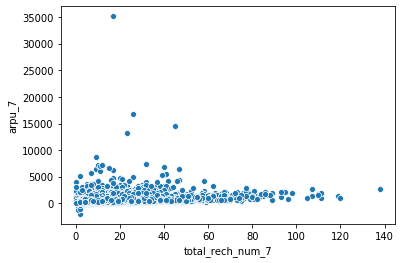

In [79]:
sns.scatterplot(hv_customer_data['total_rech_num_7'],hv_customer_data['arpu_7'])
plt.show()

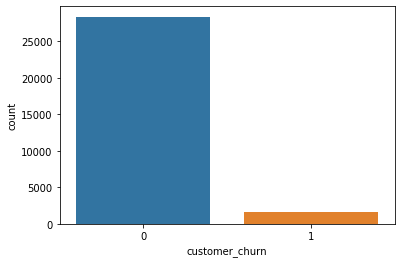

In [80]:
sns.countplot(hv_customer_data['customer_churn'])
plt.show()

As we can see from the above result that our customer_churn feature is highly imbalance so we need to take measures according to that

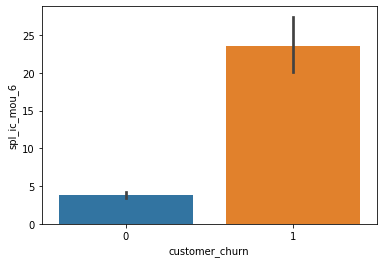

In [81]:
sns.barplot(hv_customer_data['customer_churn'],hv_customer_data['spl_ic_mou_6'])
plt.show()

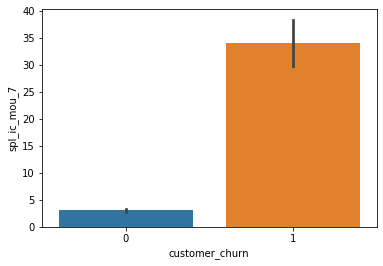

In [82]:
sns.barplot(hv_customer_data['customer_churn'],hv_customer_data['spl_ic_mou_7'])
plt.show()

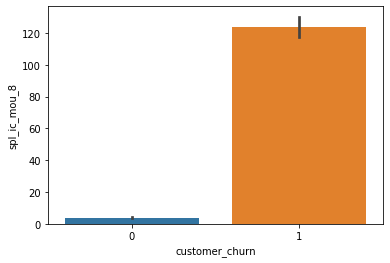

In [83]:
sns.barplot(hv_customer_data['customer_churn'],hv_customer_data['spl_ic_mou_8'])
plt.show()

As we can see from above three plots that Special Incoming Call [Minute of usage-voice call] is increasing for the customer who are classifed as churn

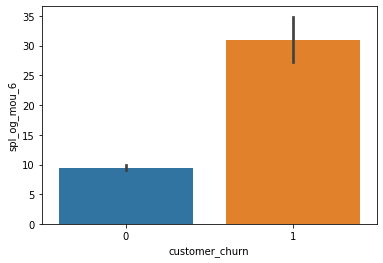

In [84]:
sns.barplot(hv_customer_data['customer_churn'],hv_customer_data['spl_og_mou_6'])
plt.show()

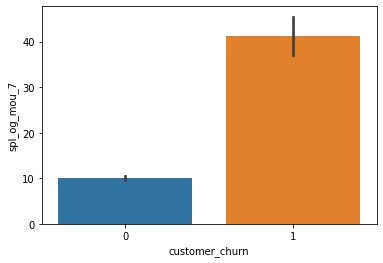

In [85]:
sns.barplot(hv_customer_data['customer_churn'],hv_customer_data['spl_og_mou_7'])
plt.show()

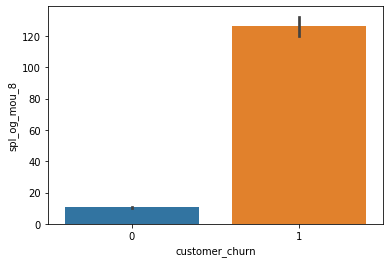

In [86]:
sns.barplot(hv_customer_data['customer_churn'],hv_customer_data['spl_og_mou_8'])
plt.show()

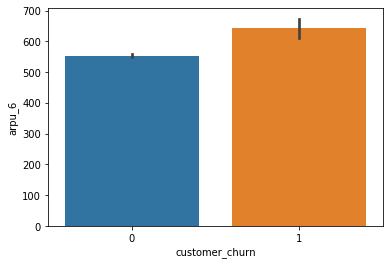

In [87]:
sns.barplot(hv_customer_data['customer_churn'],hv_customer_data['arpu_6'])
plt.show()

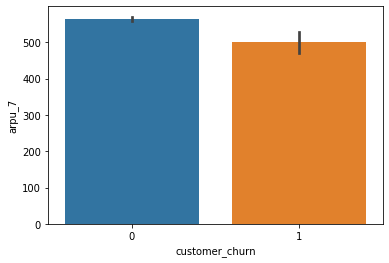

In [88]:
sns.barplot(hv_customer_data['customer_churn'],hv_customer_data['arpu_7'])
plt.show()

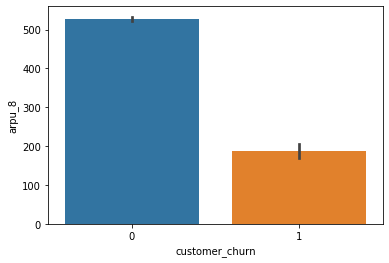

In [89]:
sns.barplot(hv_customer_data['customer_churn'],hv_customer_data['arpu_8'])
plt.show()

As we can see that Average revenue per user is decreasing for the user who are classified as churn. For the 6 month churn user are contributiing more than non churn user.

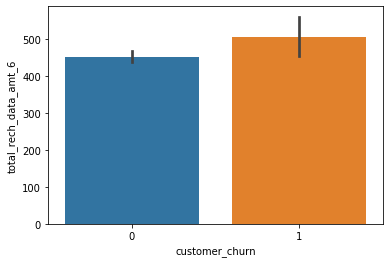

In [90]:
sns.barplot(hv_customer_data['customer_churn'],hv_customer_data['total_rech_data_amt_6'])
plt.show()

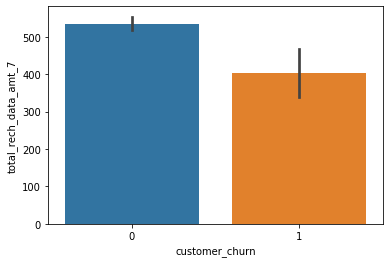

In [91]:
sns.barplot(hv_customer_data['customer_churn'],hv_customer_data['total_rech_data_amt_7'])
plt.show()

From the above two graph we can see that total recharge data amount was decreasing for the user who are classifed as churn

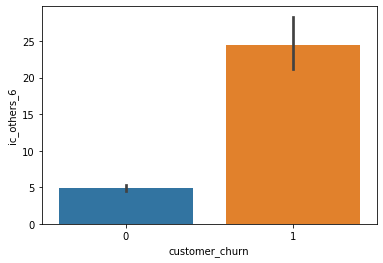

In [92]:
sns.barplot(hv_customer_data['customer_churn'],hv_customer_data['ic_others_6'])
plt.show()

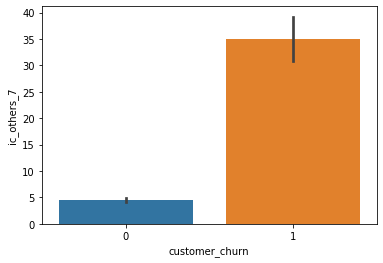

In [93]:
sns.barplot(hv_customer_data['customer_churn'],hv_customer_data['ic_others_7'])
plt.show()

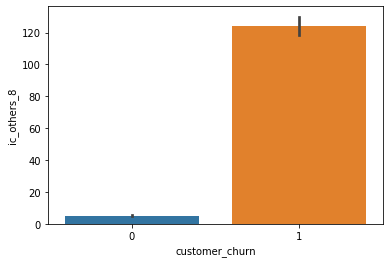

In [94]:
sns.barplot(hv_customer_data['customer_churn'],hv_customer_data['ic_others_8'])
plt.show()

As we can see from the above result incoming others is getting increased for the customer that are identified as churn

<b> As we can see from the above result that our data set is imbalance

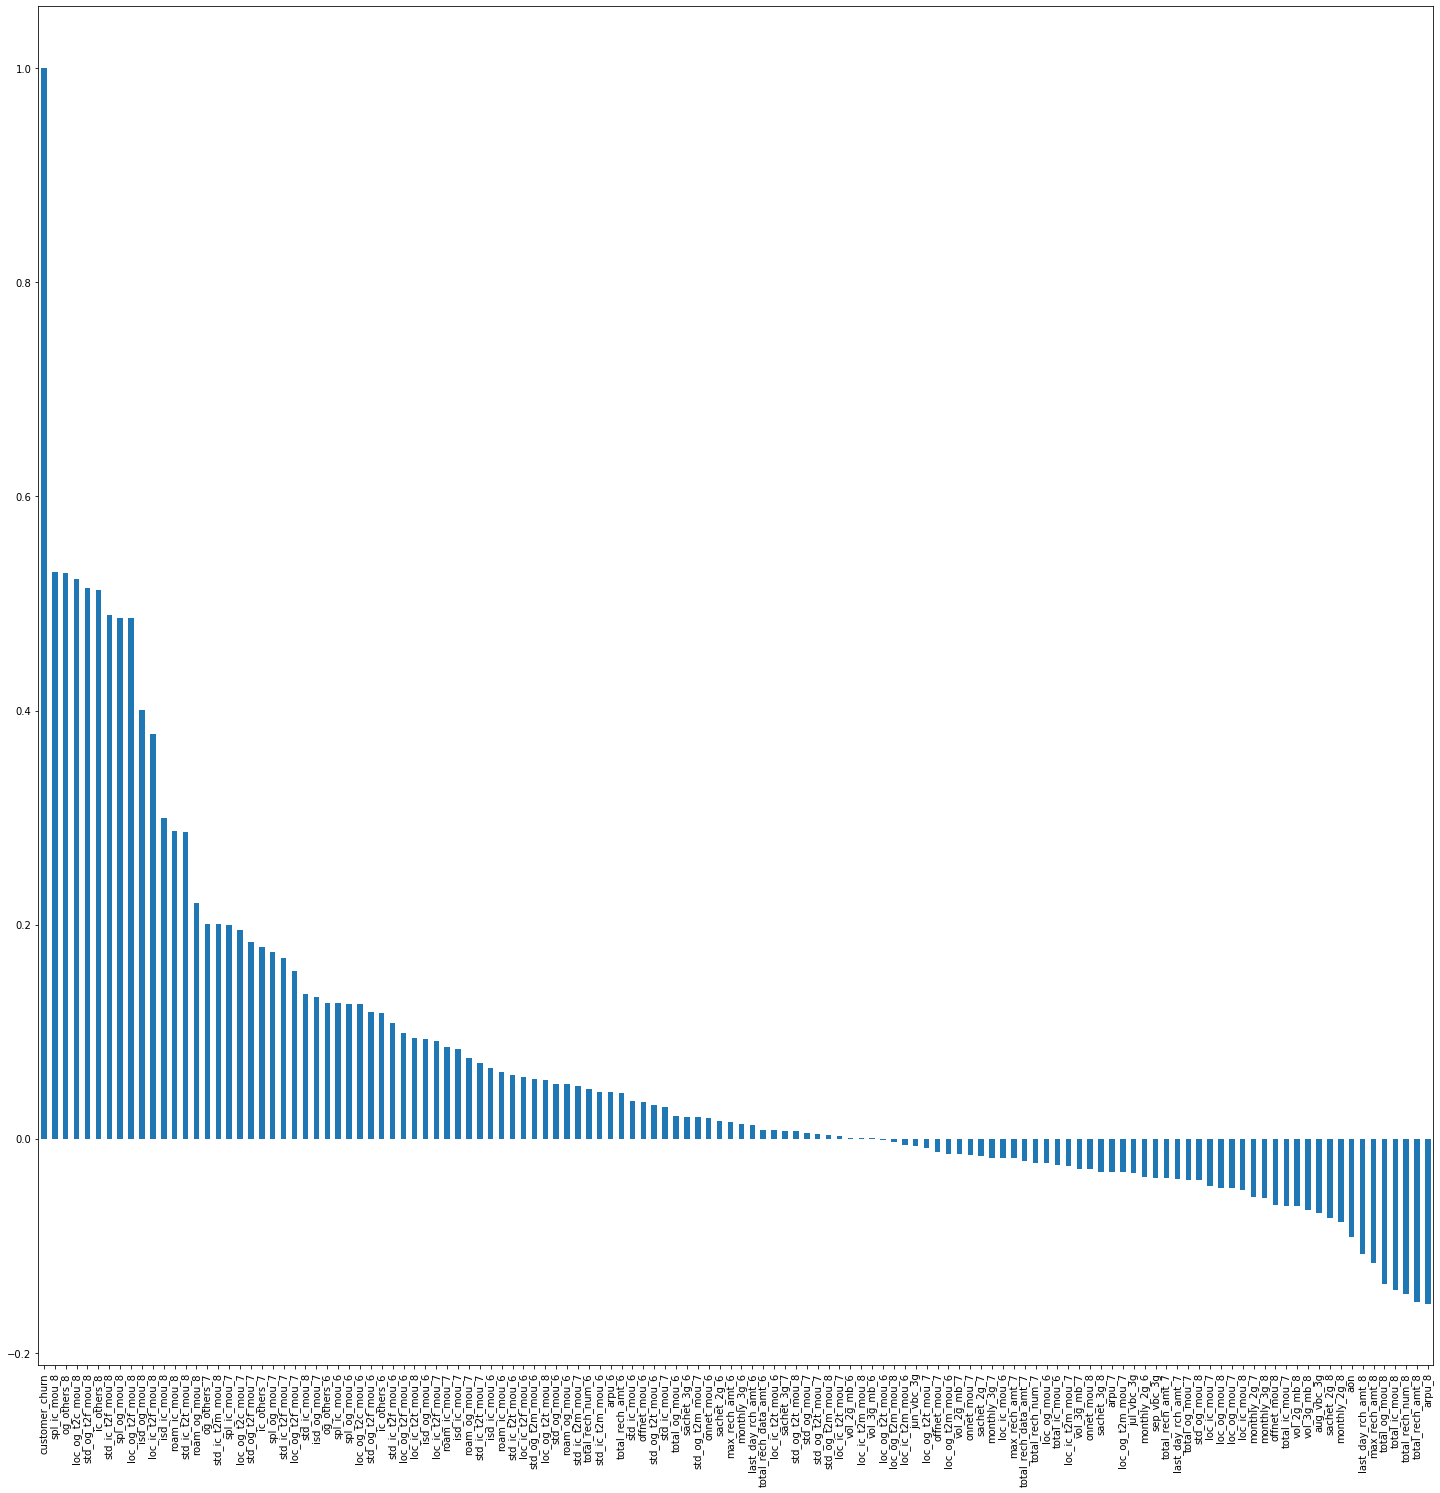

In [95]:
plt.figure(figsize=(25,25))
hv_customer_data.corr()['customer_churn'].sort_values(ascending = False).plot(kind='bar')
plt.show()

As we can see the highly correlated columns<br>
<b>Positive Correlation</b>
    <li>spl_ic_mou_8
    <li>og_others_8
    <li>loc_og_t2c_mou_8<br>
<b>Negative Correlation</b>
    <li>total_rech_amt_8
    <li>arpu_8
    <li>total_ic_mou_8


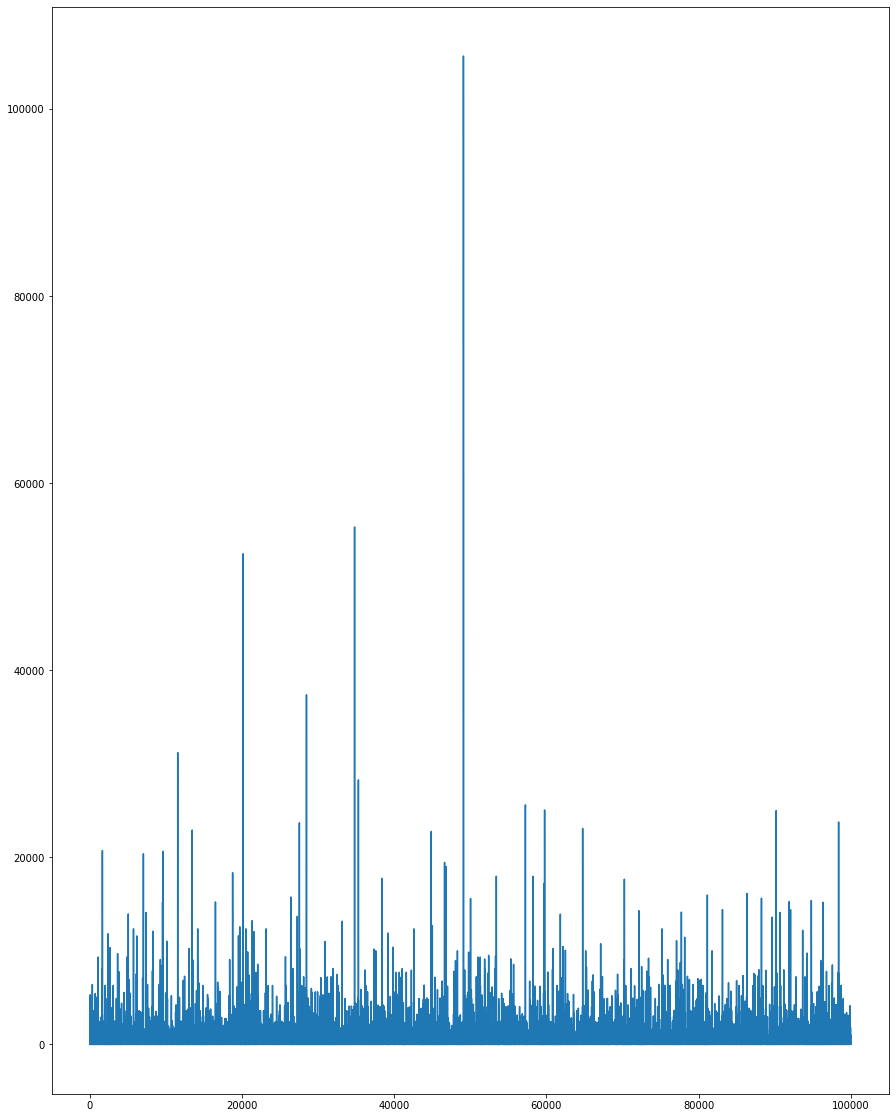

In [96]:
plt.figure(figsize=(15,20))
plt.plot(hv_customer_data['total_rech_data_amt_6'])
plt.show()

In [97]:
#dropping of date column as it is of no use

col_del=['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8']
hv_customer_data.drop(col_del,axis=1,inplace=True)

C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [98]:
hv_customer_data.shape

(30001, 125)

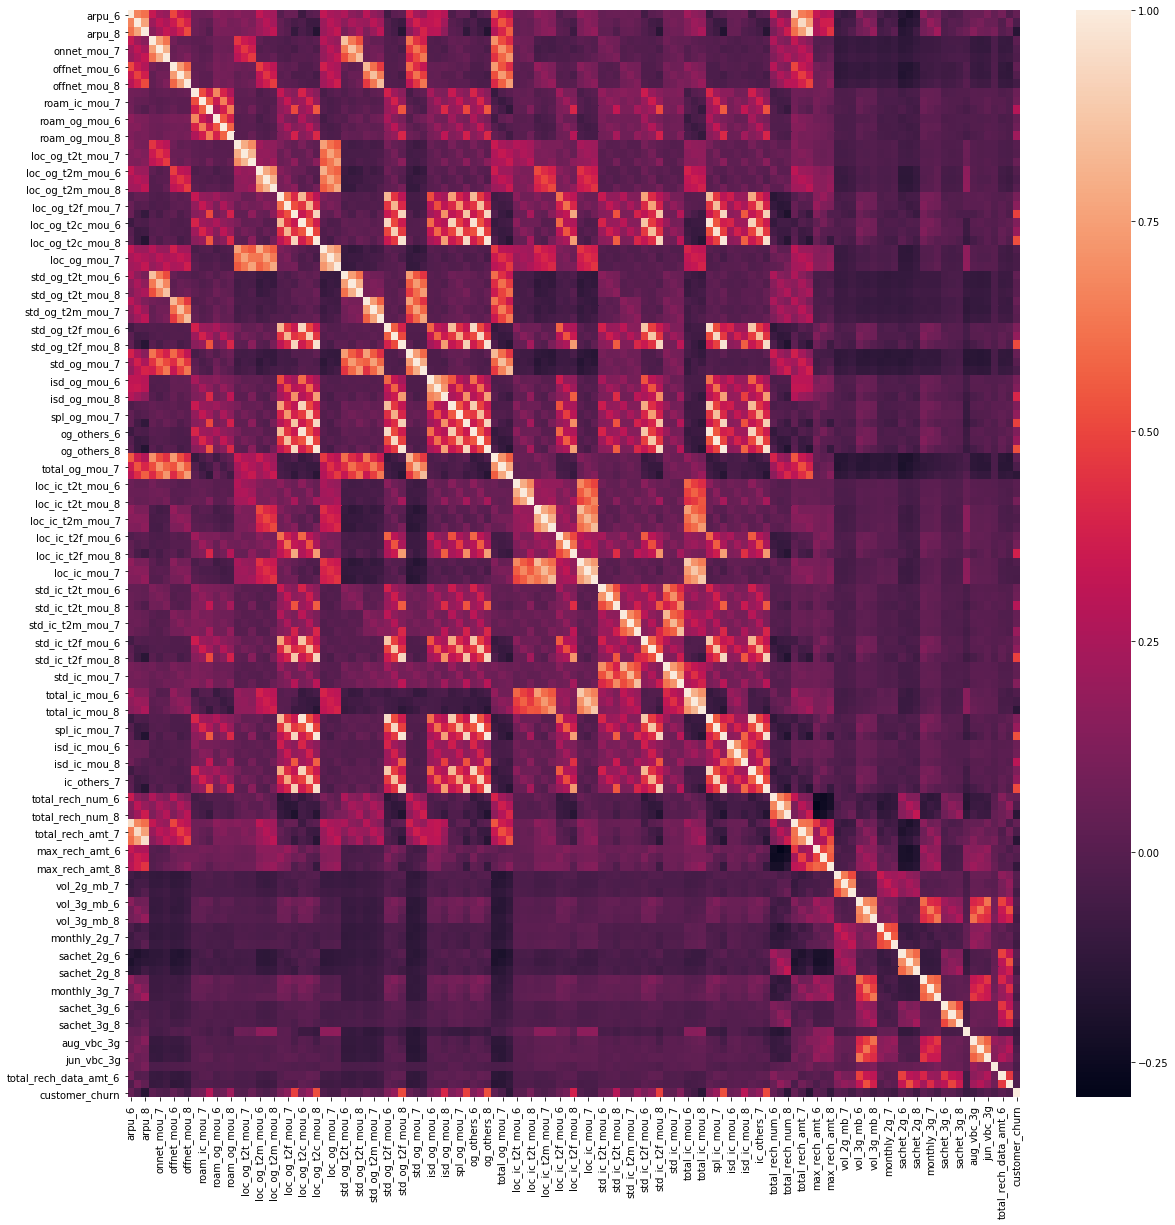

In [99]:
#Heat Map
plt.figure(figsize=(20,20))
sns.heatmap(hv_customer_data.corr())
plt.show()

In [100]:
#Seprating the dataset
X = hv_customer_data.drop(['customer_churn'], axis=1)
Y=hv_customer_data['customer_churn']

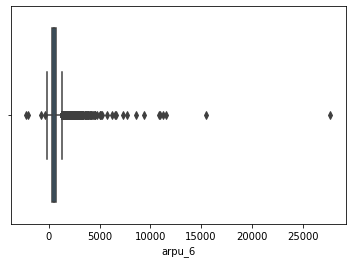

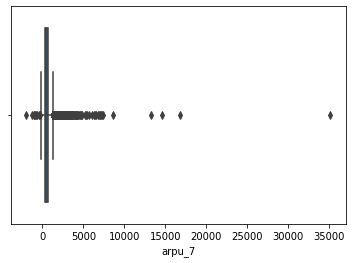

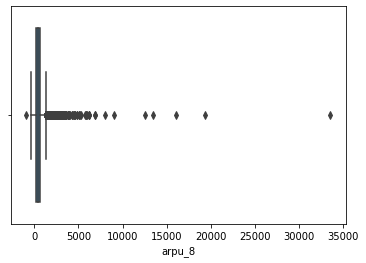

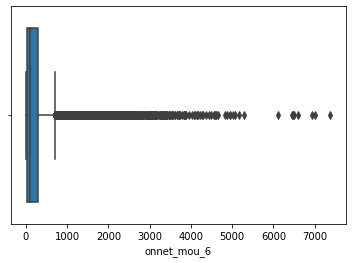

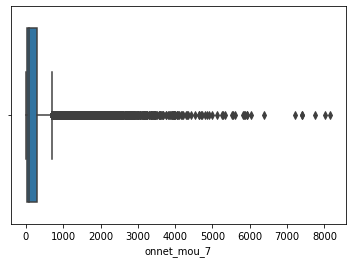

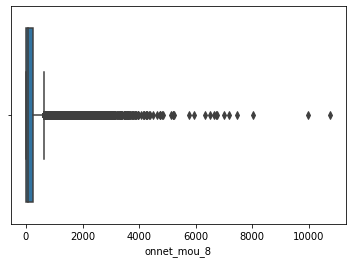

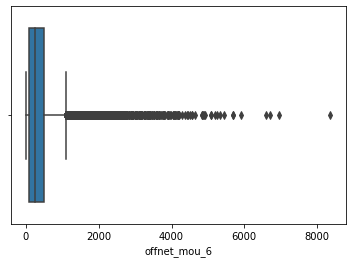

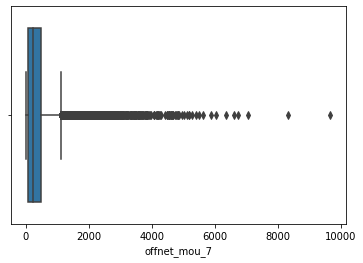

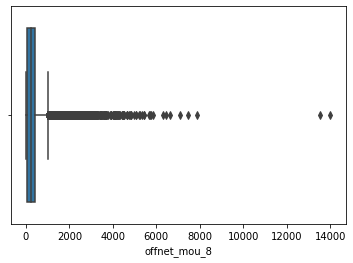

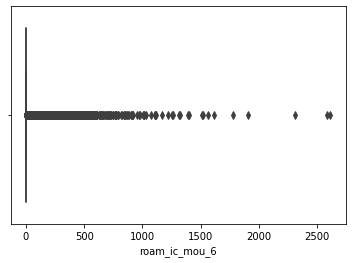

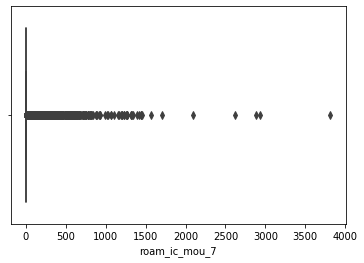

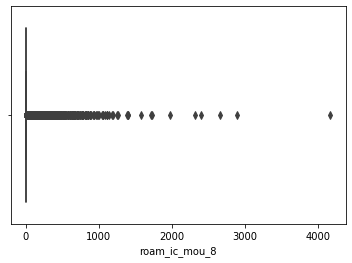

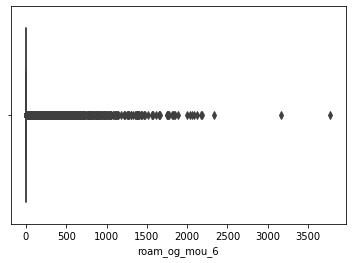

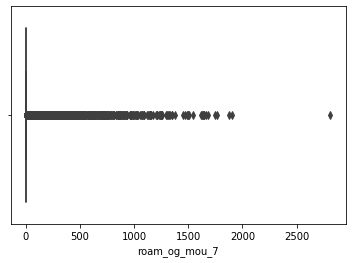

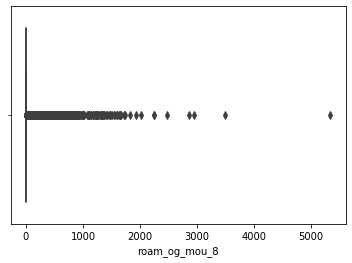

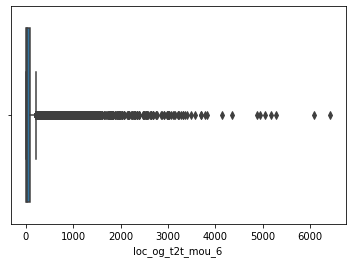

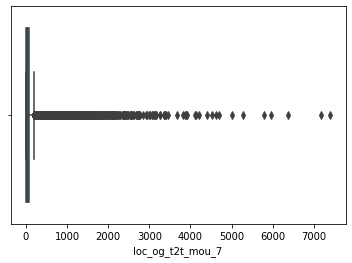

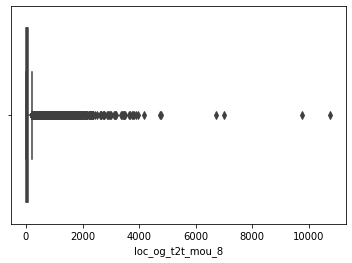

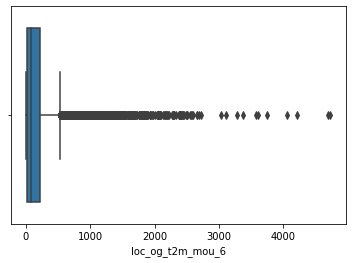

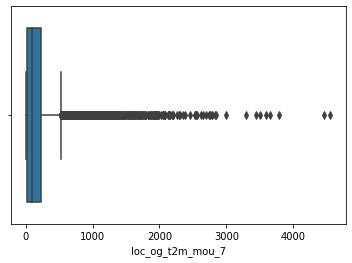

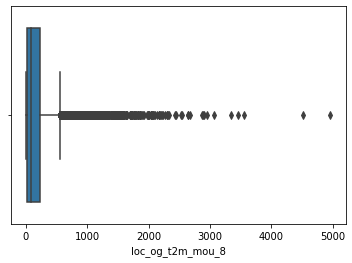

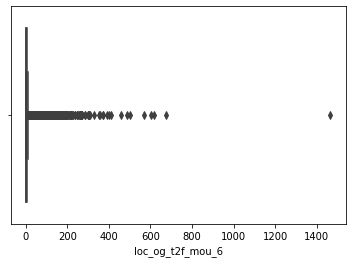

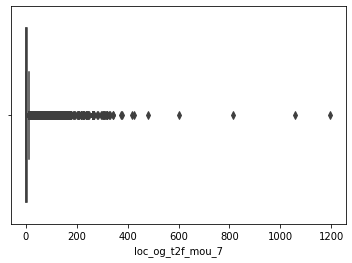

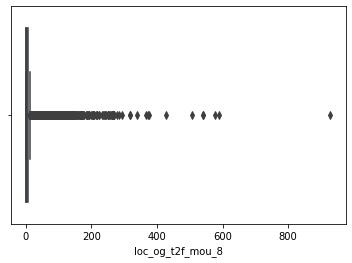

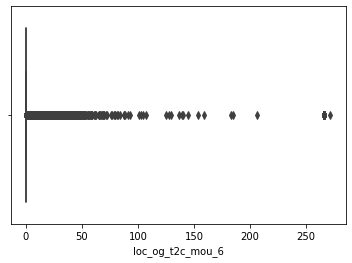

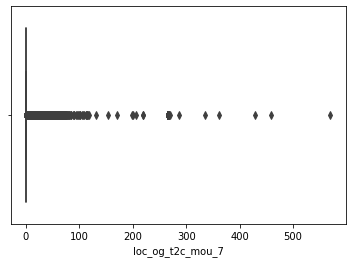

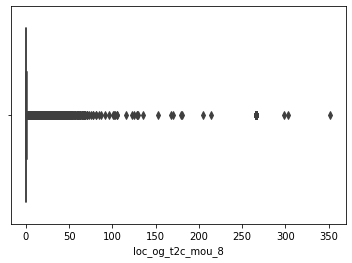

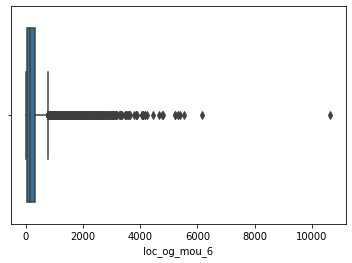

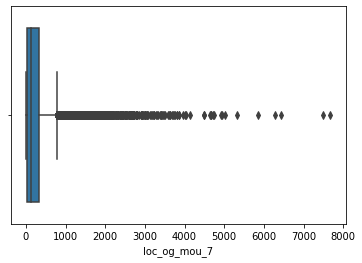

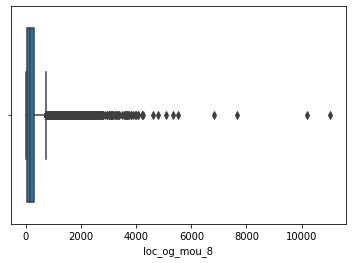

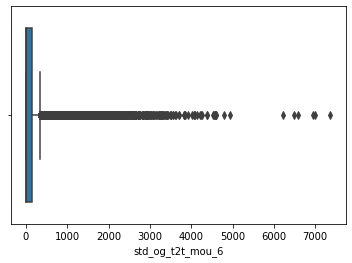

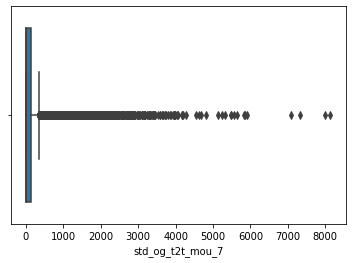

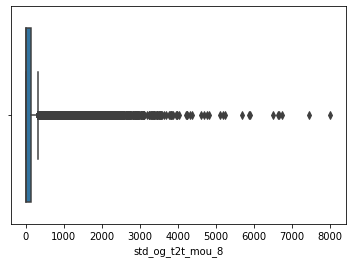

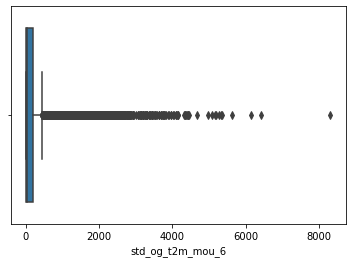

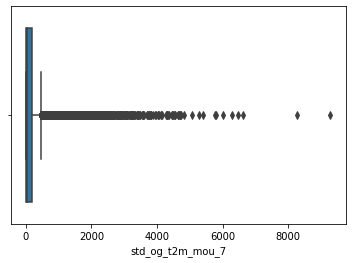

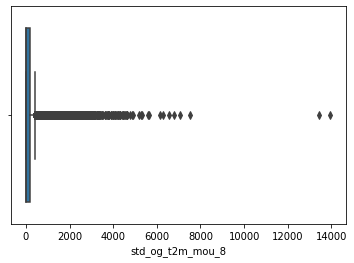

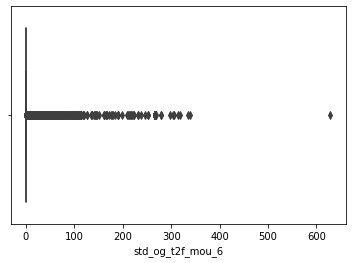

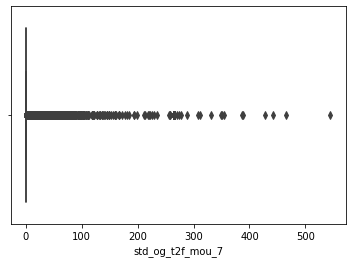

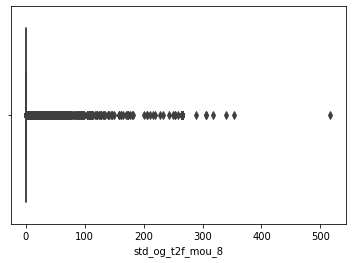

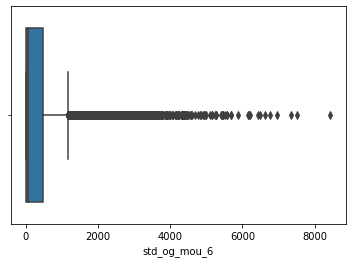

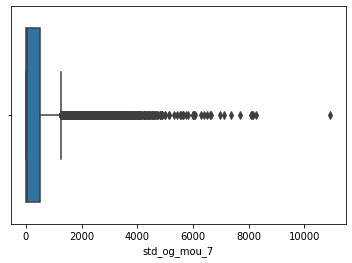

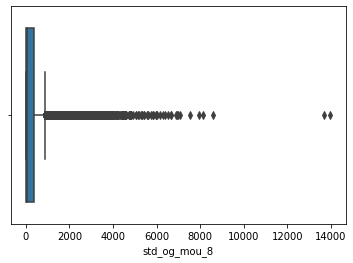

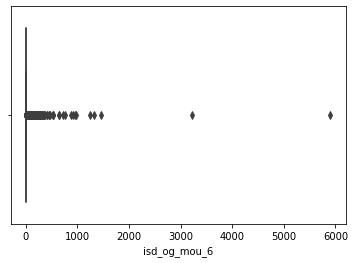

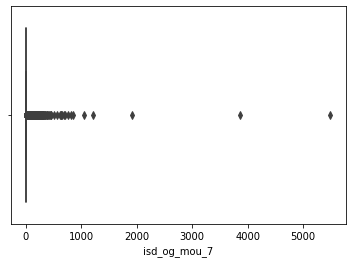

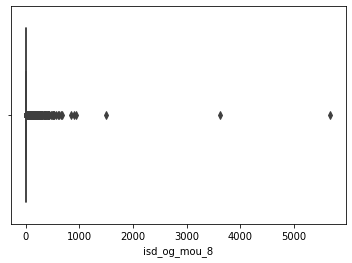

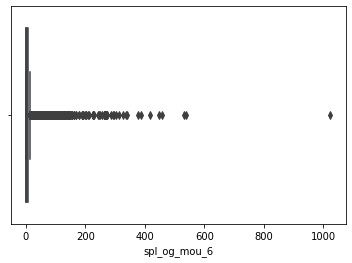

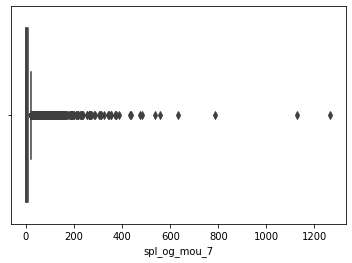

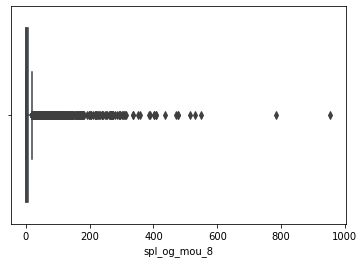

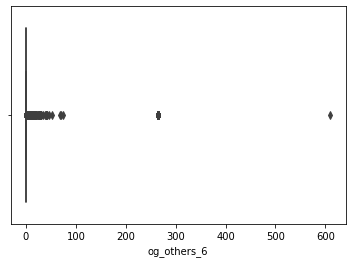

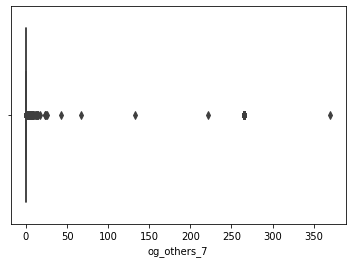

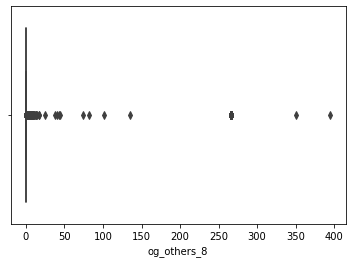

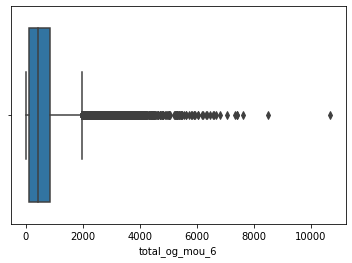

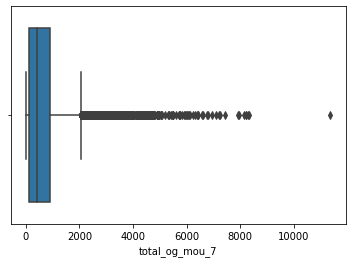

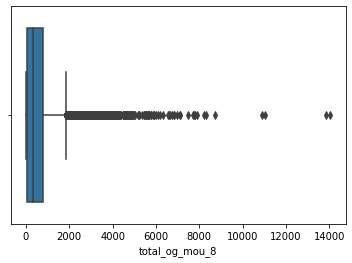

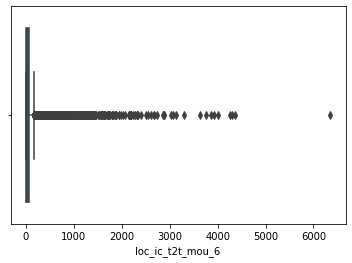

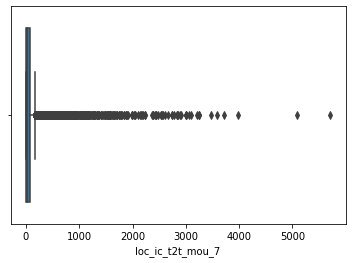

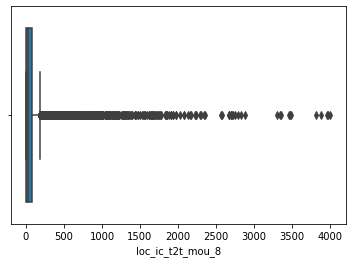

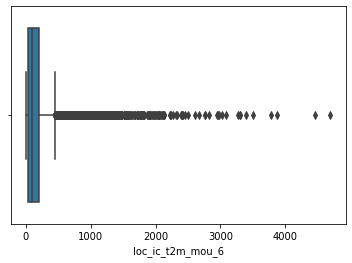

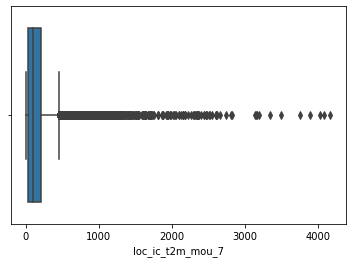

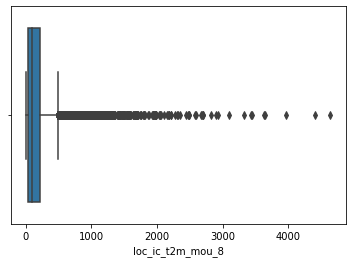

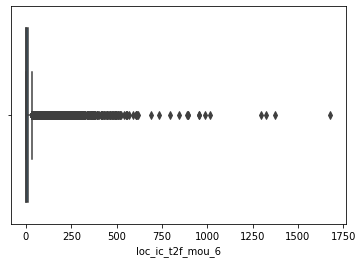

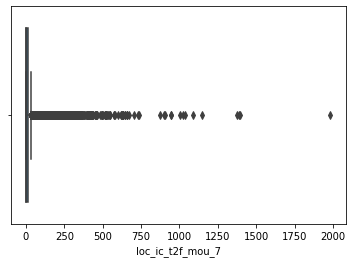

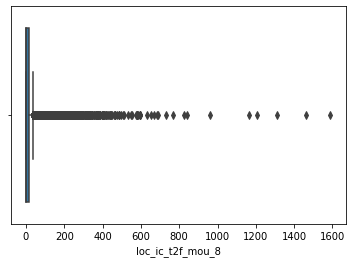

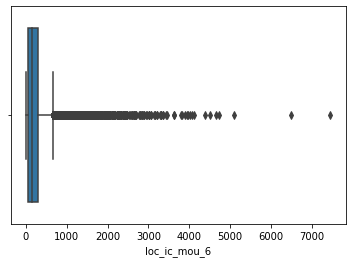

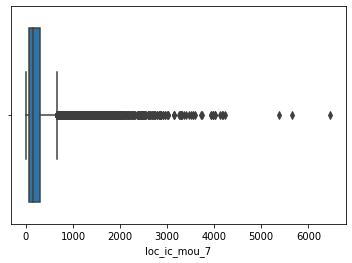

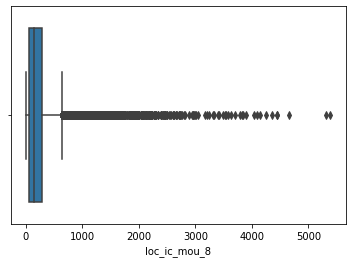

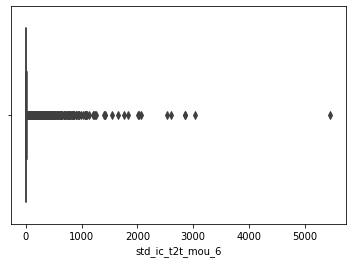

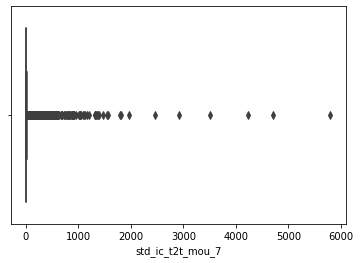

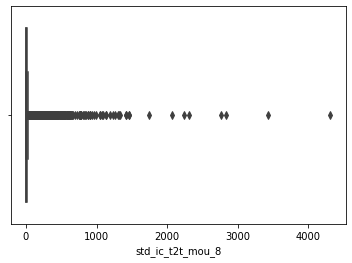

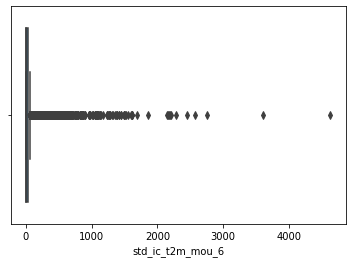

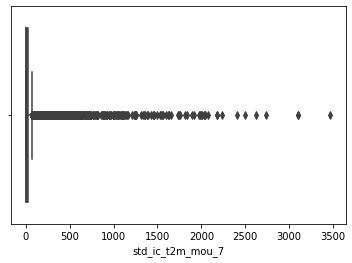

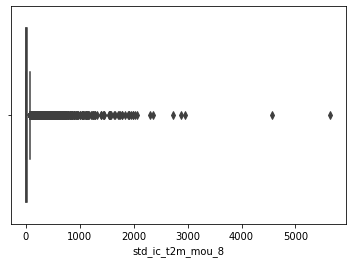

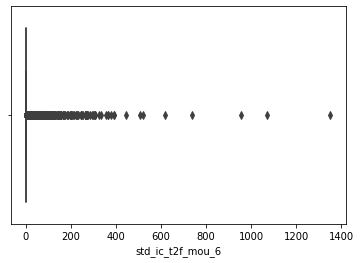

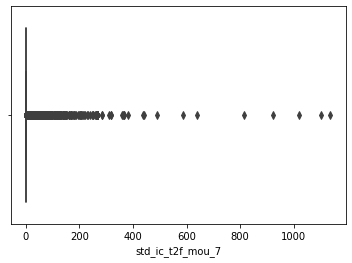

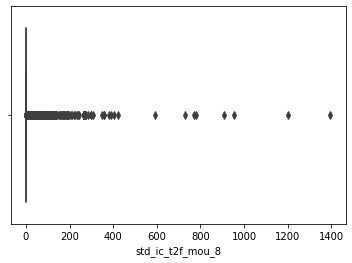

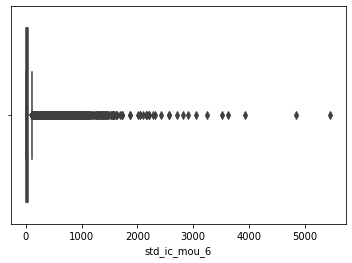

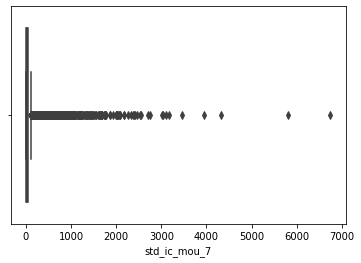

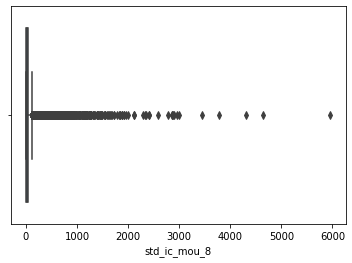

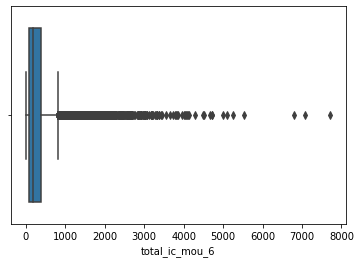

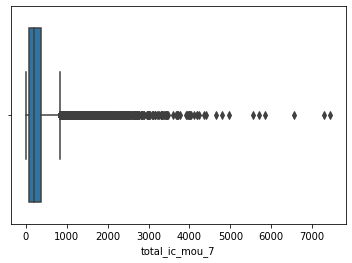

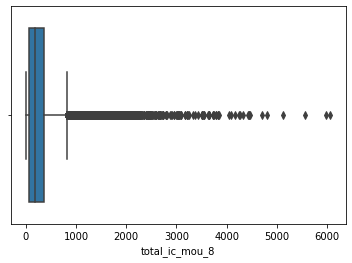

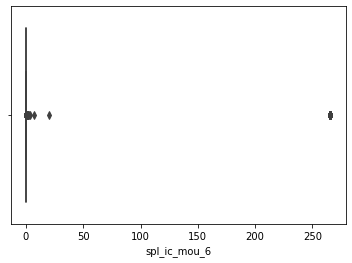

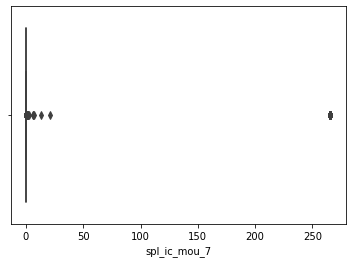

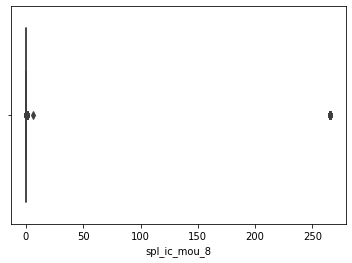

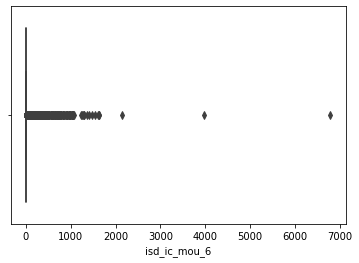

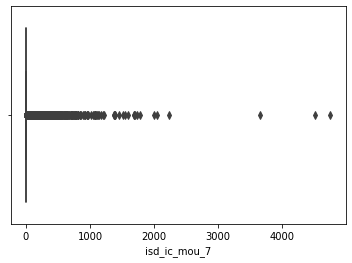

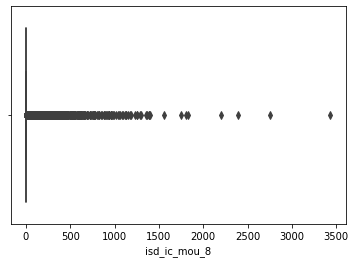

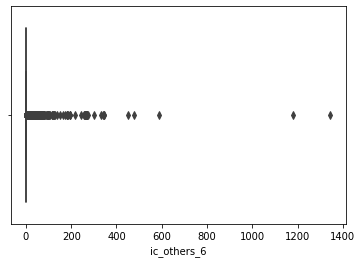

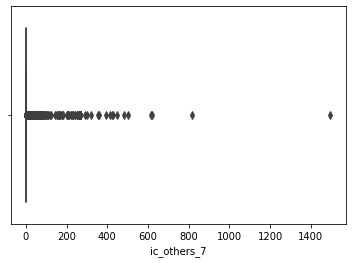

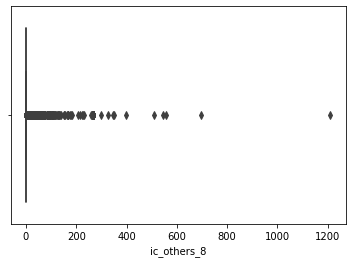

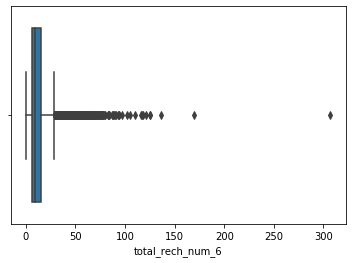

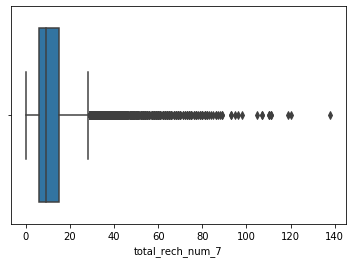

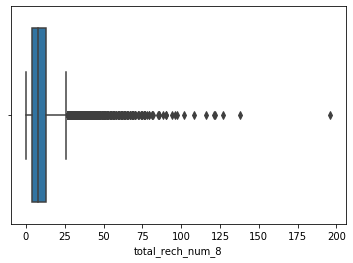

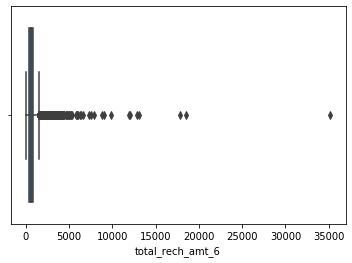

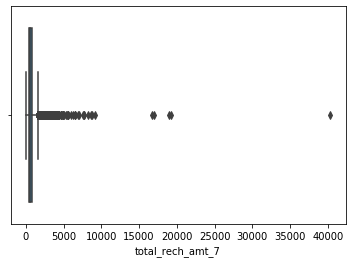

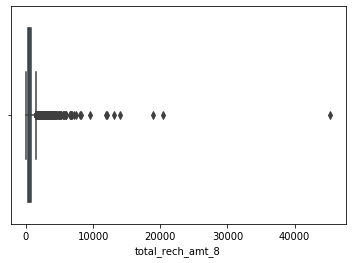

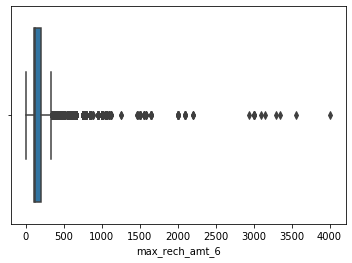

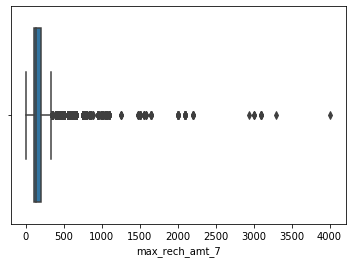

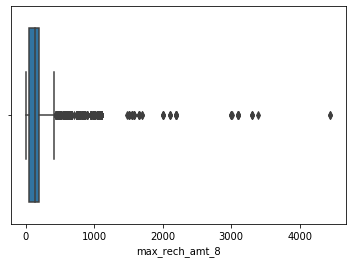

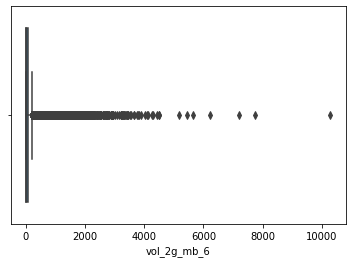

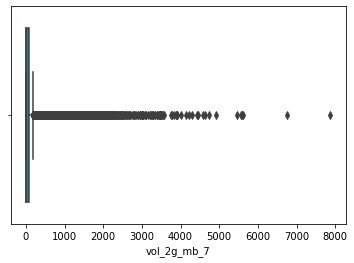

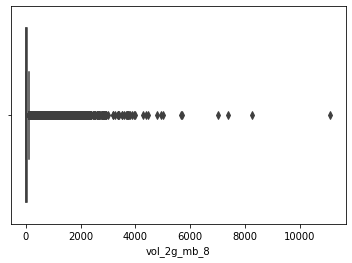

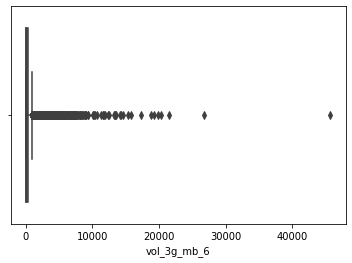

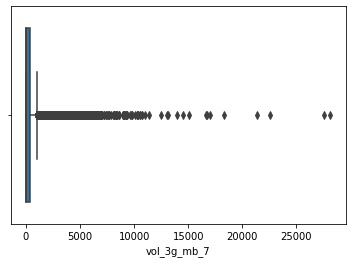

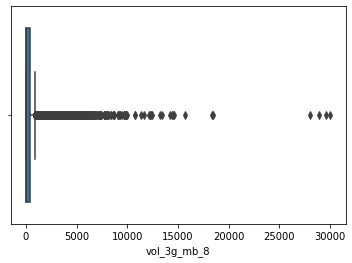

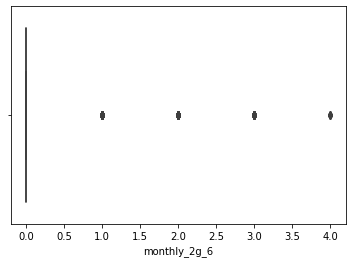

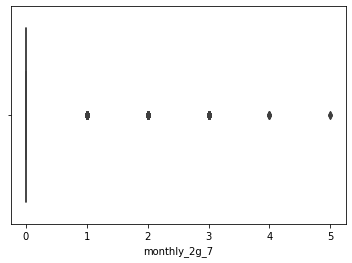

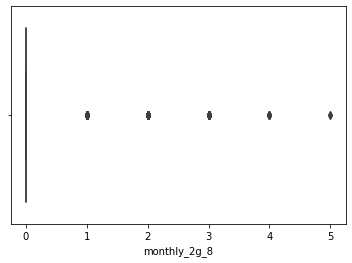

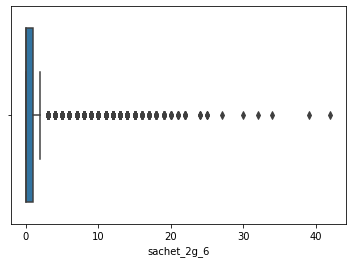

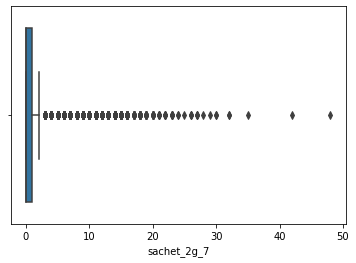

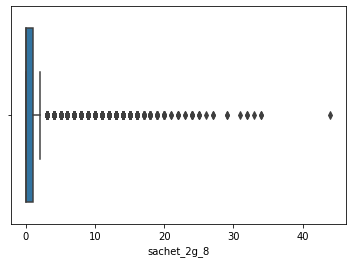

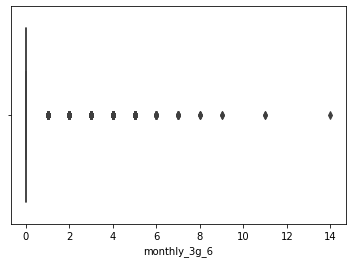

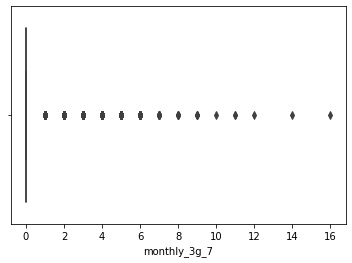

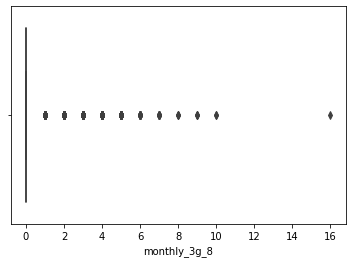

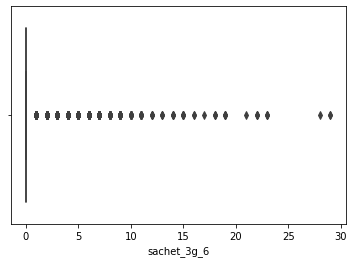

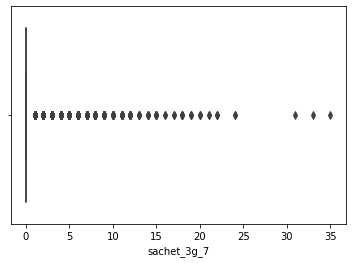

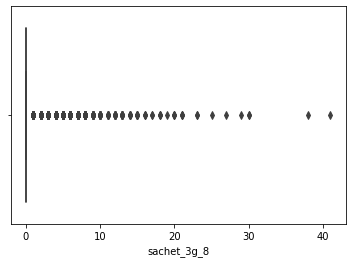

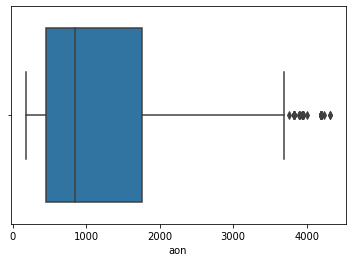

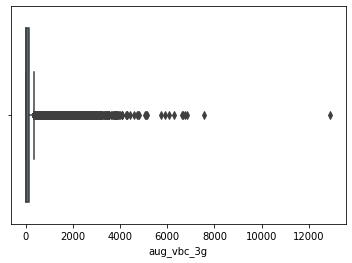

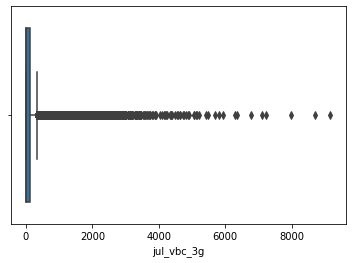

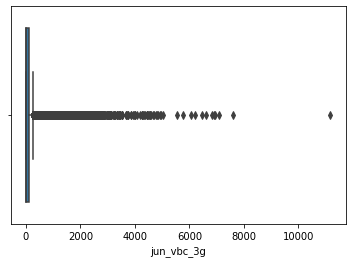

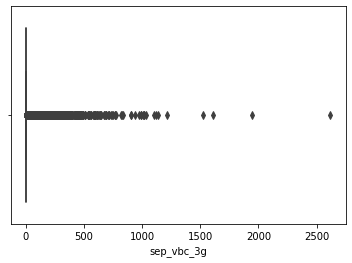

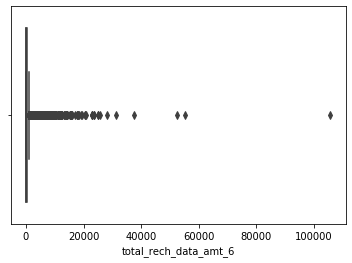

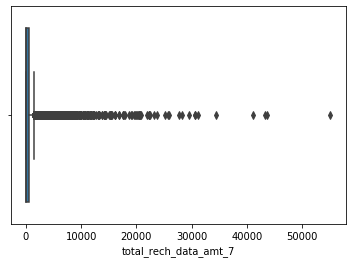

In [101]:
num_col=[]
for col in X.columns:
    if X[col].dtype=='int64' or X[col].dtype=='float64' :
            num_col.append(col)
            sns.boxplot(hv_customer_data[col])
            plt.show()
    

In [102]:
hv_customer_data['customer_churn'].dtype

dtype('int64')

In [103]:
obj_col=[]
for col in X.columns:
    if X[col].dtype=='object':
        obj_col.append(col)

In [104]:
obj_col

[]

As we can see from the above result that there are no object column

<b>Dropping outlier

In [105]:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            print('Not')
            df[col]=df[col]
    return df

hv_customer_data_updated=cap_data(hv_customer_data)


capping the  arpu_6


C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A 

capping the  arpu_7
capping the  arpu_8
capping the  onnet_mou_6
capping the  onnet_mou_7
capping the  onnet_mou_8
capping the  offnet_mou_6
capping the  offnet_mou_7
capping the  offnet_mou_8
capping the  roam_ic_mou_6
capping the  roam_ic_mou_7
capping the  roam_ic_mou_8
capping the  roam_og_mou_6
capping the  roam_og_mou_7
capping the  roam_og_mou_8
capping the  loc_og_t2t_mou_6
capping the  loc_og_t2t_mou_7
capping the  loc_og_t2t_mou_8
capping the  loc_og_t2m_mou_6
capping the  loc_og_t2m_mou_7
capping the  loc_og_t2m_mou_8
capping the  loc_og_t2f_mou_6
capping the  loc_og_t2f_mou_7
capping the  loc_og_t2f_mou_8
capping the  loc_og_t2c_mou_6
capping the  loc_og_t2c_mou_7
capping the  loc_og_t2c_mou_8
capping the  loc_og_mou_6
capping the  loc_og_mou_7
capping the  loc_og_mou_8
capping the  std_og_t2t_mou_6
capping the  std_og_t2t_mou_7
capping the  std_og_t2t_mou_8
capping the  std_og_t2m_mou_6
capping the  std_og_t2m_mou_7
capping the  std_og_t2m_mou_8
capping the  std_og_t2f_mou

C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCo

capping the  total_rech_num_7


C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCo

capping the  total_rech_num_8


C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCo

capping the  total_rech_amt_6


C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCo

capping the  total_rech_amt_7


C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCo

capping the  total_rech_amt_8


C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCo

capping the  max_rech_amt_6


C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCo

capping the  max_rech_amt_7


C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCo

capping the  max_rech_amt_8


C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCo

capping the  vol_2g_mb_6


C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


capping the  vol_2g_mb_7
capping the  vol_2g_mb_8
capping the  vol_3g_mb_6
capping the  vol_3g_mb_7
capping the  vol_3g_mb_8
capping the  monthly_2g_6


C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCo

capping the  monthly_2g_7


C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCo

capping the  monthly_2g_8


C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCo

capping the  sachet_2g_6


C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCo

capping the  sachet_2g_7


C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCo

capping the  sachet_2g_8


C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCo

capping the  monthly_3g_6


C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCo

capping the  monthly_3g_7


C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCo

capping the  monthly_3g_8


C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCo

capping the  sachet_3g_6


C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCo

capping the  sachet_3g_7


C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCo

capping the  sachet_3g_8


C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCo

capping the  aon


C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCo

capping the  aug_vbc_3g


C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


capping the  jul_vbc_3g
capping the  jun_vbc_3g
capping the  sep_vbc_3g
capping the  total_rech_data_amt_6
capping the  total_rech_data_amt_7
capping the  customer_churn


C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\bhupe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\bhupe\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCo

In [106]:
hv_customer_data_updated.shape

(30001, 125)

In [107]:
#Seprating the dataset
X = hv_customer_data_updated.drop(['customer_churn'], axis=1)
Y=hv_customer_data_updated['customer_churn']

<h3>Top Features in our dataset

In [127]:
model_feature_selector = SelectFromModel(LogisticRegression(), max_features=20)
model_feature_selector.fit(X, Y)

model_support = model_feature_selector.get_support()
top_features = X.loc[:,model_support].columns.tolist()

C:\Users\bhupe\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [124]:
#top features
top_features

['roam_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_8',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_mou_8',
 'std_ic_t2m_mou_7',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'vol_2g_mb_8',
 'sep_vbc_3g']

<b>Scaling of dataset

In [109]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

<b>Train test split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)


Dimension of X_train: (21000, 124)
Dimension of X_test: (9001, 124)


<b>SMOTE

Applying SMOTE to make the dataset as balance

In [111]:
#SMOTE
sm = SMOTE(random_state = 2)
X_train_bal,y_train_bal = sm.fit_sample(X_train,y_train)

<b>Logistics Regression

In [112]:
#Logistics Regression
lm_model_simple=LogisticRegression(max_iter=5000)
lm_model_simple.fit(X_train_bal,y_train_bal)
pred=lm_model_simple.predict(X_test)
metrics.accuracy_score(y_test, pred)


0.8596822575269415

In [113]:
print('Accuracy Score :',accuracy_score(y_test, pred))
print('Report : ')
print(classification_report(y_test, pred))

Accuracy Score : 0.8596822575269415
Report : 
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      8497
           1       0.26      0.80      0.39       504

    accuracy                           0.86      9001
   macro avg       0.62      0.83      0.65      9001
weighted avg       0.95      0.86      0.89      9001



In [114]:
results_lm = confusion_matrix(y_test, pred) 
  
print(results_lm)

[[7336 1161]
 [ 102  402]]


<b> Support Vector Machine

In [115]:
#SVM
svm_model_simple=SVC(kernel='linear')
svm_model_simple.fit(X_train_bal,y_train_bal)
pred_svm=lm_model_simple.predict(X_test)
metrics.accuracy_score(y_test, pred_svm)

0.8596822575269415

In [116]:
print('Accuracy Score :',accuracy_score(y_test, pred_svm))
print('Report : ')
print(classification_report(y_test, pred_svm))

Accuracy Score : 0.8596822575269415
Report : 
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      8497
           1       0.26      0.80      0.39       504

    accuracy                           0.86      9001
   macro avg       0.62      0.83      0.65      9001
weighted avg       0.95      0.86      0.89      9001



In [117]:
results_svm = confusion_matrix(y_test, pred_svm) 
  
print(results_svm)

[[7336 1161]
 [ 102  402]]


<b>Random Forest

In [118]:
#Random Forest
rf_model_simple=RandomForestClassifier()
rf_model_simple.fit(X_train_bal,y_train_bal)
pred_rf=rf_model_simple.predict(X_test)
metrics.accuracy_score(y_test, pred_rf)

0.9508943450727697

In [119]:
print('Accuracy Score :',accuracy_score(y_test, pred_rf))
print('Report : ')
print(classification_report(y_test, pred_rf))

Accuracy Score : 0.9508943450727697
Report : 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      8497
           1       0.57      0.47      0.52       504

    accuracy                           0.95      9001
   macro avg       0.77      0.73      0.75      9001
weighted avg       0.95      0.95      0.95      9001



In [120]:
results_rf = confusion_matrix(y_test, pred_rf) 
  
print(results_rf)

[[8320  177]
 [ 265  239]]


<b>XgBoost

In [121]:
#XGBoost
XGB_model_simple = XGBClassifier()
XGB_model_simple.fit(X_train_bal,y_train_bal)
pred_xgb = XGB_model_simple.predict(X_test)
metrics.accuracy_score(y_test, pred_xgb)

0.9544495056104877

In [122]:
print('Accuracy Score :',accuracy_score(y_test, pred_xgb))
print('Report : ')
print(classification_report(y_test, pred_xgb))

Accuracy Score : 0.9544495056104877
Report : 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      8497
           1       0.64      0.44      0.52       504

    accuracy                           0.95      9001
   macro avg       0.80      0.71      0.75      9001
weighted avg       0.95      0.95      0.95      9001



In [123]:
results_xgb= confusion_matrix(y_test, pred_xgb)  
print(results_xgb)

[[8370  127]
 [ 283  221]]


<h3>Hyperparameter tuning

In [124]:
seed = 7
kfold = KFold(n_splits=5, random_state=seed)
model = LogisticRegression(max_iter=1000)
results = cross_val_score(model, X, Y, cv=kfold)
#print("Accuracy: Final mean:%.3f%%, Final standard deviation:

C:\Users\bhupe\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [128]:
results

array([0.96267289, 0.96416667, 0.96066667, 0.963     , 0.9575    ])

<b>Logistics Regression with hyper parameter tuning

In [129]:
#Hyperparameter tuning

params = {'penalty':['l1', 'l2'],'dual':[True, False],'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 'fit_intercept':[True, False],
        'solver':['saga'], 'class_weight':[1,2]}

gridlog = GridSearchCV(LogisticRegression(), params, cv=10, n_jobs=4, scoring='roc_auc')
gridlog.fit(X_train_bal, y_train_bal)


C:\Users\bhupe\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': [1, 2], 'dual': [True, False],
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2'], 'solver': ['saga']},
             scoring='roc_auc')

In [130]:
print('Logistic Regression parameters: ', gridlog.best_params_)

Logistic Regression parameters:  {'C': 1000, 'class_weight': 1, 'dual': False, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'saga'}


In [131]:
lm_model_opt=LogisticRegression(C= 1000, dual= False, fit_intercept= True, penalty= 'l2', max_iter=0, solver='saga',class_weight=2)
lm_model_opt.fit(X_train_bal,y_train_bal)
pred_lm_opt=lm_model_opt.predict(X_test)
metrics.accuracy_score(y_test, pred_lm_opt)

0.944006221530941

In [132]:
print('Accuracy Score :',accuracy_score(y_test, pred_lm_opt))
print('Report : ')
print(classification_report(y_test, pred_lm_opt))

Accuracy Score : 0.944006221530941
Report : 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8497
           1       0.00      0.00      0.00       504

    accuracy                           0.94      9001
   macro avg       0.47      0.50      0.49      9001
weighted avg       0.89      0.94      0.92      9001



C:\Users\bhupe\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [133]:
results_opt_lm= confusion_matrix(y_test, pred_lm_opt)  
print(results_opt_lm)

[[8497    0]
 [ 504    0]]


As we can see the accuracy got increased from 0.84 to 0.91

<b>Random Forest with hyper parameter tuning

In [134]:
param_grid = { 
    'n_estimators': [200, 700, 900],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [136]:
rf_model_opt = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

gridrf=GridSearchCV(estimator=rf_model_opt, param_grid=param_grid, cv= 5)
gridrf.fit(X_train_bal, y_train_bal)

KeyboardInterrupt: 

In [ ]:
print('Random Forest parameters: ', gridrf.best_params_)

In [ ]:
rf_model_opt=RandomForestClassifier(max_features='log2', n_estimators=900,bootstrap=True,criterion='gini')
rf_model_opt.fit(X_train_bal,y_train_bal)
pred_rf_opt=rf_model_opt.predict(X_test)
metrics.accuracy_score(y_test, pred_rf_opt)

In [ ]:
print('Accuracy Score :',accuracy_score(y_test, pred_rf_opt))
print('Report : ')
print(classification_report(y_test, pred_rf_opt))

In [ ]:
results_opt_rf= confusion_matrix(y_test, pred_rf_opt)  
print(results_opt_rf)

As we can see from the above result that there is slight increase in the accuracy of Random Forest model

In [ ]:
X_lab = hv_customer_data_updated.drop(['customer_churn'], axis=1)
Y_lab=hv_customer_data_updated['customer_churn']

In [ ]:
fn=X_lab.columns
cn='customer_churn'
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (100,50), dpi=500)
tree.plot_tree(rf_model_opt.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

<h3>Principal Component Analysis[PCA])

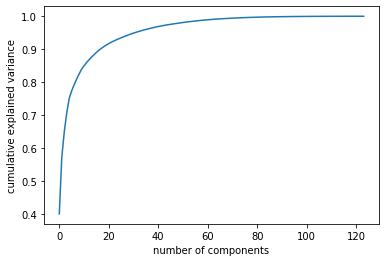

In [137]:
pca = PCA().fit(X_train_bal)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

As we can see from the above result that with 40 components we are getting variance of more than 90 percent

In [138]:
pca = PCA(n_components = 40) 
  
X_train_pca = pca.fit_transform(X_train_bal) 
X_test_pca = pca.transform(X_test) 

<b>Logistics Regression with PCA

In [139]:
#Logistics Regression
lm_model_pca=LogisticRegression(C= 0.1, dual= False, fit_intercept= True, penalty= 'l2', max_iter=0, solver='saga',class_weight=1)
lm_model_pca.fit(X_train_pca,y_train_bal)
pred_pca=lm_model_pca.predict(X_test_pca)
metrics.accuracy_score(y_test, pred_pca)


0.944006221530941

In [140]:
print('Accuracy Score :',accuracy_score(y_test, pred_pca))
print('Report : ')
print(classification_report(y_test, pred_pca))

Accuracy Score : 0.944006221530941
Report : 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8497
           1       0.00      0.00      0.00       504

    accuracy                           0.94      9001
   macro avg       0.47      0.50      0.49      9001
weighted avg       0.89      0.94      0.92      9001



C:\Users\bhupe\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [141]:
results_opt_lm_pca= confusion_matrix(y_test, pred_pca)  
print(results_opt_lm_pca)

[[8497    0]
 [ 504    0]]


<b>Random Forest with PCA

In [ ]:
#Hyperparameter tuning

params = {'penalty':['l1', 'l2'],'dual':[True, False],'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 'fit_intercept':[True, False],
        'solver':['saga'], 'class_weight':[1,2]}

gridlog = GridSearchCV(LogisticRegression(), params, cv=10, n_jobs=4, scoring='roc_auc')
gridlog.fit(X_train_pca, y_train_bal)


In [ ]:
print('Logistic Regression parameters: ', gridlog.best_params_)

In [ ]:
lm_model_pca=LogisticRegression(C= 1, dual= False, fit_intercept= True, penalty= 'l2', max_iter=0, solver='saga',class_weight=1)
lm_model_pca.fit(X_train_pca,y_train_bal)
pred_pca=lm_model_pca.predict(X_test_pca)
metrics.accuracy_score(y_test, pred_pca)


In [ ]:
param_grid1 = { 
    'n_estimators': [200, 700, 900],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
}

In [ ]:
rf_model_pca = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

gridrf_pca=GridSearchCV(estimator=rf_model_pca, param_grid=param_grid1, cv= 5)
gridrf_pca.fit(X_train_pca, y_train_bal)

In [ ]:
print('Random Forest parameters: ', gridrf_pca.best_params_)

In [ ]:
#Random Forest
rf_model_pca=RandomForestClassifier(max_features='log2', n_estimators=1200,bootstrap=True,criterion='entropy')
rf_model_pca.fit(X_train_pca,y_train_bal)
pred_rf_pca=rf_model_pca.predict(X_test_pca)
metrics.accuracy_score(y_test, pred_rf_pca)

In [ ]:
print('Accuracy Score :',accuracy_score(y_test, pred_rf_pca))
print('Report : ')
print(classification_report(y_test, pred_rf_pca))

In [ ]:
results_opt_rf_pca= confusion_matrix(y_test, pred_rf_pca)  
print(results_opt_rf_pca)

In [ ]:
param_grid2 = { 
    'min_samples_split': range(100, 500, 25),
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(25, 175, 50),
}


In [ ]:
rf_model_pca = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

gridrf_pca=GridSearchCV(estimator=rf_model_pca, param_grid=param_grid2, cv= 5)
gridrf_pca.fit(X_train_pca, y_train_bal)

In [ ]:
print('Random Forest parameters: ', gridrf_pca.best_params_)

In [ ]:
#Random Forest
rf_model_pca=RandomForestClassifier(max_depth=10,min_samples_leaf=25,min_samples_split=100,n_estimators=1200,bootstrap=True)
rf_model_pca.fit(X_train_pca,y_train_bal)
pred_rf_pca=rf_model_pca.predict(X_test_pca)
metrics.accuracy_score(y_test, pred_rf_pca)

<b>Xgboost with PCA and hyperparameter tuning

In [142]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
grid_search_opt = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
grid_search_opt.fit(X_train_pca,y_train_bal)
print(grid_search_opt.best_params_)

C:\Users\bhupe\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'gamma': 0.1}


In [143]:
xg_opt_pca=XGBClassifier( learning_rate =0.1, n_estimators=1400, max_depth=20,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27, 
  scoring='roc_auc',n_jobs=4,iid=False)

In [144]:
xg_opt_pca.fit(X_train_pca,y_train_bal)

[19:11:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { iid, scoring } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              iid=False, importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=20,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=1400, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              scoring='roc_auc', seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [145]:
pred_opt_xg_pca=xg_opt_pca.predict(X_test_pca)

In [146]:
metrics.accuracy_score(y_test, pred_opt_xg_pca)

0.9468947894678369

In [147]:
print('Accuracy Score :',accuracy_score(y_test, pred_opt_xg_pca))
print('Report : ')
print(classification_report(y_test, pred_opt_xg_pca))

Accuracy Score : 0.9468947894678369
Report : 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8497
           1       0.53      0.51      0.52       504

    accuracy                           0.95      9001
   macro avg       0.75      0.74      0.74      9001
weighted avg       0.95      0.95      0.95      9001



In [148]:
results_opt_xg_pca= confusion_matrix(y_test, pred_opt_xg_pca)  
print(results_opt_xg_pca)

[[8268  229]
 [ 249  255]]


As we can see that the accuracy for the Xgboost model got increase from 0.91 to 0.92

We are using Random Forest model with tuned one inorder to created predicted dataframe as the model is giving highest accuracy among all the models

In [149]:
y_test['preds']=pred_rf_opt

NameError: name 'pred_rf_opt' is not defined

As we can see that the accuracy for the Xgboost model got increase from 0.91 to 0.92

In [150]:
Filter_df  = copy_data[copy_data.index.isin(y_test.index)]

In [151]:
Filter_df['Churn_Prediction']=y_test['preds']

KeyError: 'preds'

In [ ]:
#Report for the user on which prediction was done
Filter_df.head(50)

In [ ]:
Filter_df.tail(50)